# 第3章 计算机视觉基础

## 3.1 计算机视觉

### 3.1.1 计算机视觉概述

计算机视觉（Computer Vision）又称机器视觉（Machine Vision），是一门让机器学会如何去“看”的学科，是深度学习技术的一个重要应用领域，被广泛应用到安防、工业质检和自动驾驶等场景。具体的说，就是让机器去识别摄像机拍摄的图片或视频中的物体，检测出物体所在的位置，并对目标物体进行跟踪，从而理解并描述出图片或视频里的场景和故事，以此来模拟人脑视觉系统。因此，计算机视觉也通常被叫做机器视觉，其目的是建立能够从图像或者视频中“感知”信息的人工系统。


计算机视觉的发展历程要从生物视觉讲起。对于生物视觉的起源，目前学术界尚没有形成定论。有研究者认为最早的生物视觉形成于距今约[7亿年前的水母之中](https://www.pnas.org/content/109/46/18868)，也有研究者认为生物视觉产生于距今约5亿年前寒武纪【[1](https://doi.org/10.1038%2Fnature10097), [2](https://en.wikipedia.org/wiki/Evolution_of_the_eye)】。寒武纪生物大爆发的原因一直是个未解之谜，不过可以肯定的是在寒武纪动物具有了视觉能力，捕食者可以更容易地发现猎物，被捕食者也可以更早的发现天敌的位置。视觉能力加剧了猎手和猎物之间的博弈，也催生出更加激烈的生存演化规则。视觉系统的形成有力地推动了食物链的演化，加速了生物进化过程，是生物发展史上重要的里程碑。经过几亿年的演化，目前人类的视觉系统已经具备非常高的复杂度和强大的功能，人脑中神经元数目达到了1000亿个，这些神经元通过网络互相连接，这样庞大的视觉神经网络使得我们可以很轻松的观察周围的世界，如 **图1** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/70d8475ed908487680057bf1f2760f10e367e7176acf43ebb380207b748b2377" width = "600"></center>
<center><br>图1：人类视觉感知</br></center>
<br></br>



### 3.1.2 计算机视觉应用场景

计算机视觉技术经过几十年的发展，已经在交通（车牌识别、道路违章抓拍）、安防（人脸闸机、小区监控）、金融（刷脸支付、柜台的自动票据识别）、医疗（医疗影像诊断）、工业生产（产品缺陷自动检测）等多个领域应用，影响或正在改变人们的日常生活和工业生产方式。未来，随着技术的不断演进，必将涌现出更多的产品和应用，为我们的生活创造更大的便利和更广阔的机会。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/93476b373dd342d1aae22397aa24c58fc60ab68307fd448189f16c8284723e9d" width = "500"></center>
<center><br>图2：计算机视觉技术在各领域的应用</br></center>
<br></br>

### 3.1.3 计算机视觉任务的挑战


对人类来说，识别猫和狗是件非常容易的事。但对计算机来说，即使是一个精通编程的高手，也很难轻松写出具有通用性的程序（比如：假设程序认为体型大的是狗，体型小的是猫，但由于拍摄角度不同，可能一张图片上猫占据的像素比狗还多）。计算机视觉任务在许多方面都具有挑战性，物体外观和所处环境往往变化很大，目标被遮挡、目标尺寸变化、目标变形、背景嘈杂、环境光照变化，如 **图5** 所示

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/90513f72043a4ec3bb74560c1014822292211a27c39641f9b9b732b83cdb09bd" width = "500"></center>
<center><br>图3：计算机视觉技术在各领域的应用</br></center>
<br></br>

除此之外，计算机视觉任务还面临数据量有限、数据类别不均衡、速度实时需求等挑战。

****
图片来源：KristenGrauman, BastianLeibe, Visual Object Recognition
****

## 3.2 常见的计算机视觉任务简介和基础概念

计算机视觉任务依赖于图像特征(图像信息)，图像特征的质量在很大程度上决定了视觉系统的性能。传统方法通常采用SIFT、HOG等算法提取图像特征，再利用SVM等机器学习算法对这些特征进一步处理来解决视觉任务。行人检测就是判断图像或视频序列中是否存在行人并给予精确定位，最早采用的方法是HOG特征提取+SVM分类器，检测流程如下：
- 利用滑动窗口对整张图像进行遍历，获得候选区域
- 提取候选区域的HOG特征
- 利用SVM分类器对特征图进行分类(判断是否是人)
- 使用滑动窗口会出现重复区域，利用NMS(非极大值)对重复的区域进行过滤

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/d1468aff55cf4e68a504cd876b1e017c4d1cd2f9dc90494eaaff4c80ec03c32e" width = "500"></center>
<center><br>图4：行人检测和NMS合并重复区域示意图</br></center>
<br></br>

分类的结果强依赖于手工特征提取方法，往往只有经验丰富的研究者才能完成。

在这种背景下，基于神经网络的特征提取方法应运而生。Yann LeCun是1998年第一次将卷积神经网络应用到图像识别领域的，其主要逻辑是使用卷积神经网络提取图像特征，并对图像所属类别进行预测，通过训练数据不断调整网络参数，最终形成一套能自动提取图像特征并对这些特征进行分类的网络LeNet[1]。这一方法在手写数字识别任务上取得了极大的成功，但在接下来的时间里，却没有得到很好的发展。其主要原因一方面是数据集不完善，只能处理简单任务，在大尺寸的数据上容易发生过拟合；另一方面是硬件瓶颈，网络模型复杂时，计算速度会特别慢。

2012年Alex Krizhevsky等人在提出了AlexNet[2], 并应用在大尺寸图片数据集ImageNet上，获得2012年ImageNet比赛冠军，极大的推动了卷积神经网络在计算机视觉领域的发展。

如 **图3** 所示。 

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/29755414bb1347bb834bd7835faa1320d91f98cefcd1468e85f8409238994879" width = "500"></center>
<center><br>图5：早期的卷积神经网络处理图像任务示意</br></center>
<br></br>

* 全连接：也称为多层感知机。
* 卷积：在卷积神经网络中，卷积层的实现方式是数学中定义的互相关运算。
* 池化：池化是使用某一位置的相邻输出的总体统计特征代替网络在该位置的输出。
* dropout：是深度学习中一种常用的抑制过拟合的方法，通过随机删除一部分神经元。

## 3.3 常见的计算机视觉任务快速实践
目前，随着互联网技术的不断进步，数据量呈现大规模的增长，越来越丰富的数据集不断涌现。另外，得益于硬件能力的提升，计算机的算力也越来越强大。不断有研究者将新的模型和算法应用到计算机视觉领域。由此催生了越来越丰富的模型结构和更加准确的精度，同时计算机视觉所处理的问题也越来越丰富，包括分类、检测、分割、场景描述、图像生成和风格变换等，甚至还不仅仅局限于2维图片，包括视频处理技术和3D视觉等，应用的领域也越来越广泛。目前主流的计算机视觉任务，主要包括图像分类、目标检测、图像分割、OCR、视频分析和图像生成等。接下来我们介绍每个任务，并通过PaddleHub工具快速进行实践。

首先安装PaddleHub：

In [1]:
!pip install paddlehub --upgrade -i https://mirror.baidu.com/pypi/simple 

Looking in indexes: https://mirror.baidu.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.6/213.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: paddlehub
    Found existing installation: paddlehub 2.0.4
    Uninstalling paddlehub-2.0.4:
      Successfully uninstalled paddlehub-2.0.4

[notice] A new release of pip available: 22.1.2 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


通过以下指令导入依赖包。

In [2]:
import paddlehub as hub
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/scipy/sparse/sputils.py:16: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/scipy/special/orthogonal.py:81: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from numpy import (exp, inf, pi, sqrt, floor, sin, cos, around, int,
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/scipy/linalg/__init__.py:217: Depre

### 3.3.1 图像分类

图像分类利用计算机对图像进行定量分析，把图像或图像中的像元或区域划分为若干个类别中的某一种，如 **图6** 所示：

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/368c6656e0364563b5d26e0f81b94755dba944a271c14b18bc112c3d6ea6d106" width = "500"></center>
<center><br>图6：图像分类示意图</br></center>
<br></br>

图像分类是计算机视觉中重要的基本问题，也是图像检测、图像分割、物体跟踪、行为分析等其他高层视觉任务的基础，在很多领域有广泛应用，包括安防领域的人脸识别和智能视频分析等，交通领域的交通场景识别，互联网领域基于内容的图像检索和相册自动归类，医学领域的图像识别等。

我们通过第一章讲解的PaddleHub快速实现图像分类，使用[resnet50_vd_dishes](https://github.com/PaddlePaddle/PaddleHub/tree/release/v2.2/modules/image/classification/resnet50_vd_dishes)模型识别如下美食图片，更多模型及实现请参考[PaddleHub模型库](https://github.com/PaddlePaddle/PaddleHub/blob/release/v2.2/modules/README_ch.md)

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/d1eb18c2f0e8400cb5e33b686da13cb7ba2afb8a83a94d32a2d455578df945df" width = "500"></center>
<center><br>图7：待分类图片</br></center>
<br></br>

In [3]:
classifier = hub.Module(name="resnet50_vd_dishes")
result = classifier.classification(images=[cv2.imread('imgs/test1.jpg')])
print('result:{}'.format(result))

Download https://bj.bcebos.com/paddlehub/paddlehub_dev/resnet50_vd_dishes_1_1_0.zip
[##################################################] 100.00%
Decompress /home/aistudio/.paddlehub/tmp/tmp0dq830aw/resnet50_vd_dishes_1_1_0.zip
[##################################################] 100.00%


[2023-05-24 09:37:47,576] [    INFO] - Successfully installed resnet50_vd_dishes-1.1.0


result:[{'白灼虾': 0.4448080360889435}]


上面介绍了ResNet模型实现了美食分类，除此之外，图像分类还包含丰富的模型，主要分为CNN骨干网络模型和Transformer骨干网络模型，每一类又分为部署到服务器端的高精度模型和部署到手机等移动端平台的轻量级系列模型，具有更快的预测速度，如 **图8** 所示：

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/8ba9786060524ccc9a71d1ba1f905f85701282afd36d4df9a46395ec197138e2" width = "500"></center>
<center><br>图8：图像分类算法</br></center>
<br></br>

****
注：如果想了解更多分类模型细节，请参考图像分类开发套件[PaddleClas](https://github.com/PaddlePaddle/PaddleClas)
****

### 3.3.2 目标检测

对计算机而言，能够“看到”的是图像被编码之后的数字，但它很难理解高层语义概念，比如图像或者视频帧中出现的目标是人还是物体，更无法定位目标出现在图像中哪个区域。目标检测的主要目的是让计算机可以自动识别图片或者视频帧中所有目标的类别，并在该目标周围绘制边界框，标示出每个目标的位置。目标检测应用场景覆盖广泛，如安全帽检测、火灾烟雾检测、人员摔倒检测、电瓶车进电梯检测等等。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/3d28910e9b3c486fbdaf68ddcee5913621c412777735461eb8f2a43701b1d1f4" width = "500"></center>
<center><br>图9：目标检测示意图</br></center>
<br></br>


我们使用PaddleHub检测模型[yolov3_darknet53_vehicles](https://github.com/PaddlePaddle/PaddleHub/blob/release/v2.2/modules/image/object_detection/yolov3_darknet53_vehicles)进行车辆检测。

Download https://bj.bcebos.com/paddlehub/paddlehub_dev/yolov3_darknet53_vehicles_1_1_0.zip
[##################################################] 100.00%
Decompress /home/aistudio/.paddlehub/tmp/tmpcmszbw6f/yolov3_darknet53_vehicles_1_1_0.zip
[##################################################] 100.00%


[2023-05-24 09:38:12,363] [    INFO] - Successfully installed yolov3_darknet53_vehicles-1.1.0
/home/aistudio/.paddlehub/modules/yolov3_darknet53_vehicles/module.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  feed_data = np.array(feed_data)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will 

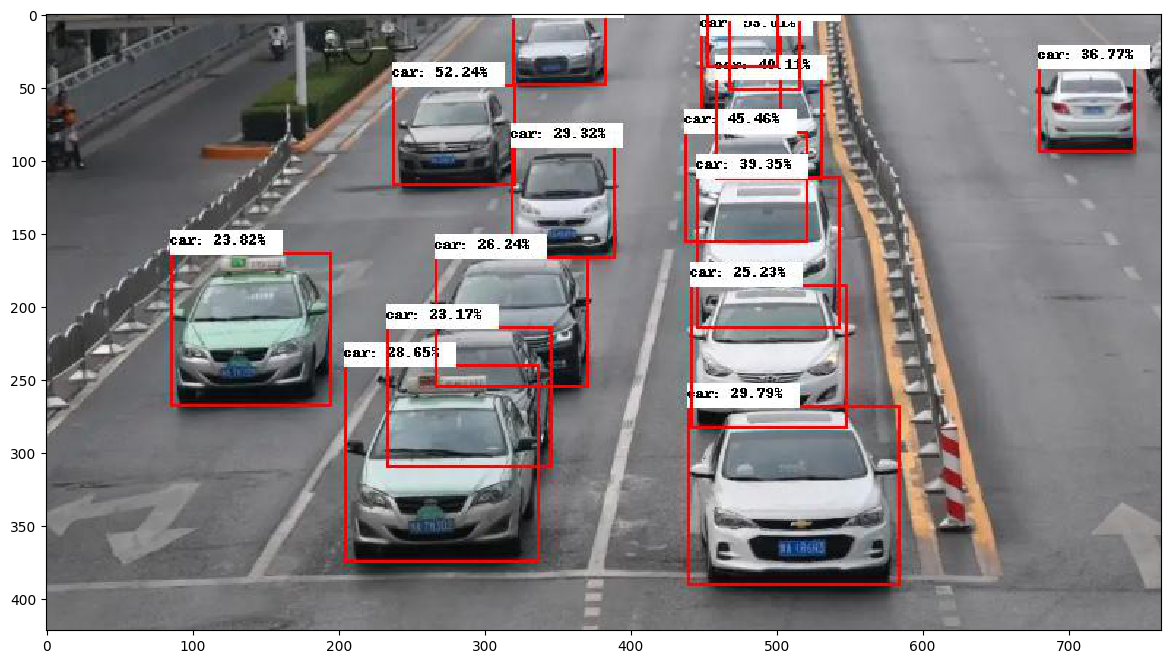

In [4]:
vehicles_detector = hub.Module(name="yolov3_darknet53_vehicles")
result = vehicles_detector.object_detection(images=[cv2.imread('imgs/test2.jpg')], visualization=True)

# 结果保存在'yolov3_vehicles_detect_output/'目录，可以观察可视化结果
img = Image.open(result[0]['save_path'])
plt.figure(figsize=(15,8))
plt.imshow(img)
plt.show()


上面使用单阶段目标检测模型YOLOv3实现了车辆检测，目前目标检测主要分为Anchor based(两阶段和单阶段)、Anchor free模型、Transformer系列如 **图10** 所示：
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/2f00530f68d049b78f85701ab31850885a03d6b54a594a8b93489ea932a8f7d7" width = "500"></center>
<center><br>图10：目标检测算法</br></center>
<br></br>


其中Anchor是预先设定好比例的一组候选框集合，Anchor based方法就是使用Anchor提取候选目标框，在特征图上的每一个点对Anchor进行分类和回归。两阶段模型表示模型分为两个阶段，第一个阶段使用anchor回归候选目标框，第二阶段使用候选目标框进一步回归和分类，输出最终目标框和对应的类别。单阶段模型无候选框提取过程，直接在输出层回归bbox的位置和类别，速度比两阶段模型块，但是可能造成精度损失。由于需要手工设计Anchor，并且Anchor匹配对不同尺寸大小的物体不友好，因此发展出Anchor free模型，不再使用预先设定的anchor，通常通过预测目标的中心或者角点，对目标进行检测。


****
注：如果想了解更多目标检测模型细节，请参考目标检测开发套件[PaddleDetection](https://github.com/PaddlePaddle/PaddleDetection)
****

### 3.3.3 图像分割

图像分割指的是将数字图像细分为多个图像子区域的过程，即对图像中的每个像素加标签，这一过程使得具有相同标签的像素具有某种共同视觉特性。图像分割的目的是简化或改变图像的表示形式，使得图像更容易理解和分析。图像分割通常用于定位图像中的物体和边界（线，曲线等）。图像分割的领域非常多，人像分割、车道线分割、无人车、地块检测、表计识别等等。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/a54407135cbb4267b060d8d106bc6cf0e261a91ec2c04c44bc1993fbf1edb8cc" width = "500"></center>
<center><br>图11：图像分割示意图</br></center>
<br></br>

我们通过PaddleHub快速实现图像分割，使用[deeplabv3p_xception65_humanseg](https://github.com/PaddlePaddle/PaddleHub/tree/release/v2.2/modules/image/semantic_segmentation/deeplabv3p_xception65_humanseg)预训练模型进行人像分割。

Download https://bj.bcebos.com/paddlehub/paddlehub_dev/deeplabv3p_xception65_humanseg_1_2_0.zip
[##################################################] 100.00%
Decompress /home/aistudio/.paddlehub/tmp/tmphe26j3ly/deeplabv3p_xception65_humanseg_1_2_0.zip
[##################################################] 100.00%


[2023-05-24 09:39:12,250] [    INFO] - Successfully installed deeplabv3p_xception65_humanseg-1.2.0


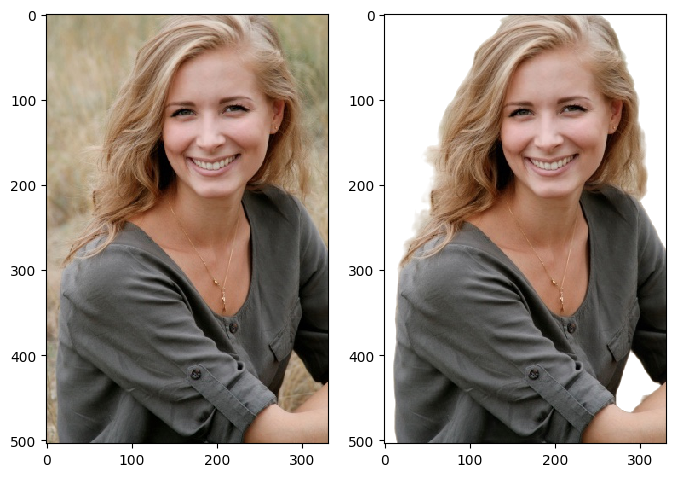

In [5]:
human_seg = hub.Module(name="deeplabv3p_xception65_humanseg")
result = human_seg.segmentation(images=[cv2.imread('./imgs/test3.jpg')], visualization=True)

# 结果保存在'humanseg_output/'目录，可以观察可视化结果
img_ori = Image.open('./imgs/test3.jpg')
img = Image.open(result[0]['save_path'])
fig = plt.figure(figsize=(8,8))
# 显示原图
ax = fig.add_subplot(1,2,1)
ax.imshow(img_ori)
# 显示人像分割图
ax = fig.add_subplot(1,2,2)
ax.imshow(img)
plt.show()

上面使用deeplabv3p识别实现了人像分割，除此之外，图像分割还包含如 **图12** 所示算法：

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/3eeb81b4280a470c967e57fed189ed238d2cf0fe27fa48d9a8f5480862c89bbe" width = "200"></center>
<center>图12：图像分割算法</center>
<br></br>

****
注：如果想了解更多图像分割模型细节，请参考图像分割开发套件[PaddleSeg](https://github.com/PaddlePaddle/PaddleSeg)
****

### 3.3.4 OCR

OCR（Optical Character Recognition，光学字符识别）是计算机视觉重要方向之一。传统定义的OCR一般面向扫描文档类对象，即文档场景文字识别(Document Analysis & Recognition，DAR)，现在我们常说的OCR一般指场景文字识别（Scene Text Recognition，STR），主要面向自然场景。OCR技术有着丰富的应用场景，如卡证票据信息抽取录入审核、工厂自动化、政府工作医院等文档电子化、在线教育等。


<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/682ac28a5bb14ae0b330d96ae17f89eb10f29d217a5449f380c203ff2ead7d3e" width = "500"></center>
<center><br>图13：文字识别示意图</br></center>
<br></br>

我们通过PaddleHub快速实现OCR任务，使用[chinese_ocr_db_crnn_mobile](https://github.com/PaddlePaddle/PaddleHub/tree/release/v2.2/modules/image/text_recognition/chinese_ocr_db_crnn_mobile)模型进行文字识别。


Download https://bj.bcebos.com/paddlehub/paddlehub_dev/chinese_ocr_db_crnn_mobile_1.2.0.zip
[##################################################] 100.00%
Decompress /home/aistudio/.paddlehub/tmp/tmpwmesvovz/chinese_ocr_db_crnn_mobile_1.2.0.zip
[##################################################] 100.00%


[2023-05-24 09:39:51,401] [    INFO] - Successfully installed chinese_ocr_db_crnn_mobile-1.2.0


Download https://bj.bcebos.com/paddlehub/paddlehub_dev/chinese_text_detection_db_mobile_1.1.0.zip
[##################################################] 100.00%
Decompress /home/aistudio/.paddlehub/tmp/tmpgej7gmnn/chinese_text_detection_db_mobile_1.1.0.zip
[##################################################] 100.00%


[2023-05-24 09:39:58,766] [    INFO] - Installing dependent packages from /home/aistudio/.paddlehub/tmp/tmpnn40u3gr/chinese_text_detection_db_mobile/requirements.txt: \ - Installing dependent packages from /home/aistudio/.paddlehub/tmp/tmpnn40u3gr/chinese_text_detection_db_mobile/requirements.txt: | - Installing dependent packages from /home/aistudio/.paddlehub/tmp/tmpnn40u3gr/chinese_text_detection_db_mobile/requirements.txt: / - Installing dependent packages from /home/aistudio/.paddlehub/tmp/tmpnn40u3gr/chinese_text_detection_db_mobile/requirements.txt: - - Installing dependent packages from /home/aistudio/.paddlehub/tmp/tmpnn40u3gr/chinese_text_detection_db_mobile/requirements.txt: \ - Installing dependent packages from /home/aistudio/.paddlehub/tmp/tmpnn40u3gr/chinese_text_detection_db_mobile/requirements.txt: | - Installing dependent packages from /home/aistudio/.paddlehub/tmp/tmpnn40u3gr/chinese_text_detection_db_mobile/requirements.txt: / - Installing dependent packages from /h

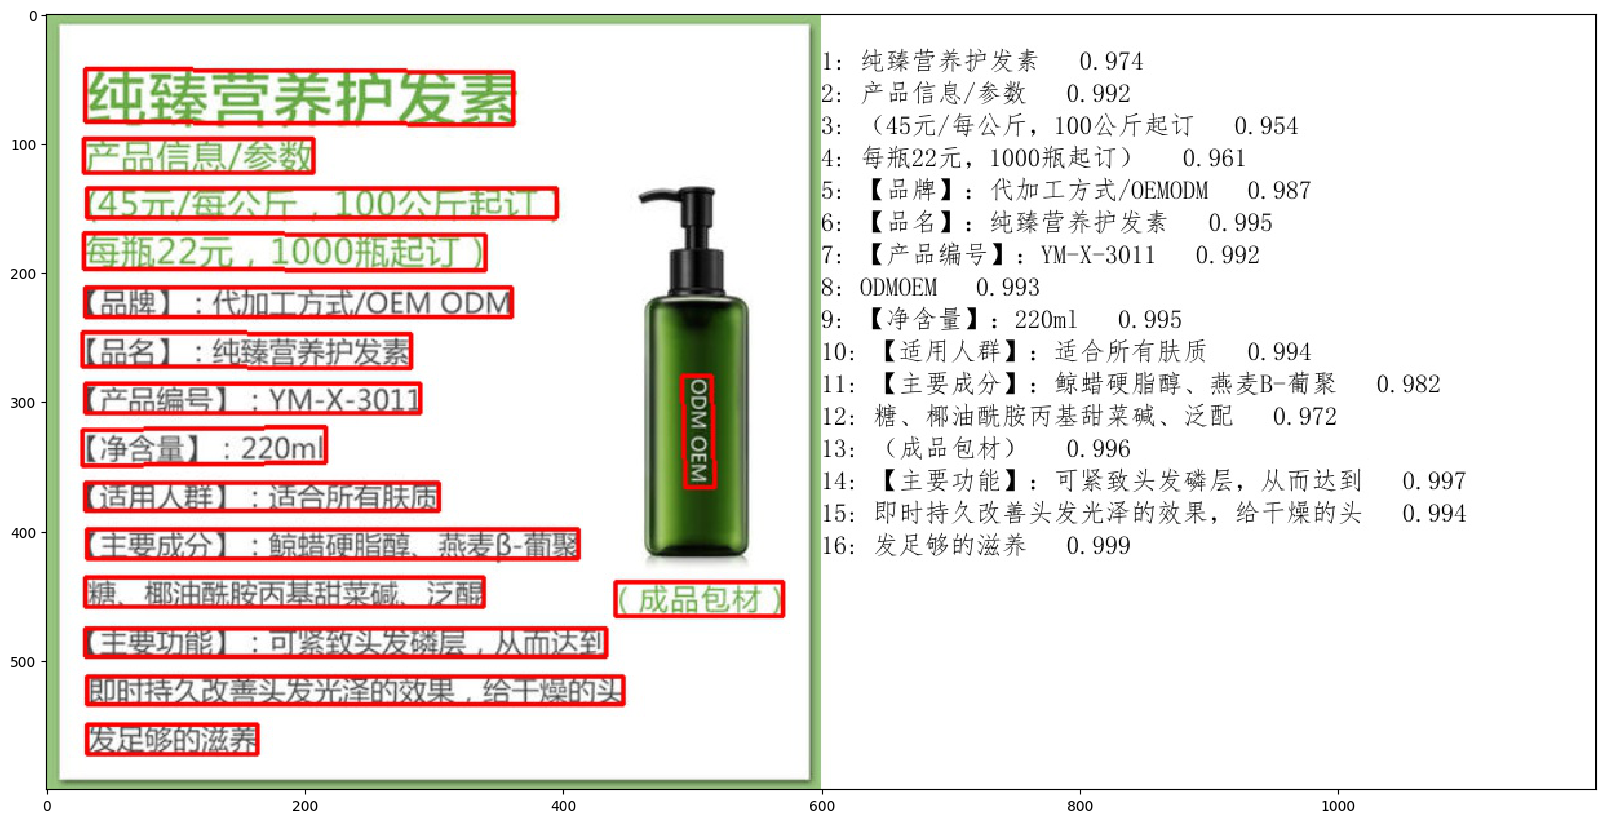

In [6]:
ocr = hub.Module(name="chinese_ocr_db_crnn_mobile")
result = ocr.recognize_text(images=[cv2.imread('./imgs/test4.jpg')], visualization=True)

# 结果保存在'ocr_result/'目录，可以观察可视化结果
img = Image.open(result[0]['save_path'])
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()


上面使用DBNet检测模型和CRNN识别实现了文字识别，可以看到上述OCR实现过程分为检测和识别2个模型，我们称之为两阶段算法，除此之外还有端到端算法，使用一个模型同时完成文字检测和文字识别。文档分析能够帮助开发者更好地完成文档理解相关任务，通常OCR算法和文档分析算法结合使用。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/e652e800b4434dd68c18a06a312681b601bc7954832e448d8fff7dd8c02fa1e8" width = "500"></center>
<center><br>图14：OCR算法</br></center>

其中，[版面分析](https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppstructure/layout/README_ch.md)识别文档中的图像、文本、标题和表格等区域，然后对文本、标题等区域进行OCR的检测识别，如 **图15(a)** 所示。[表格识别](https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppstructure/table/README_ch.md)对文档中表格区域进行结构化分析，最终结果输出Excel文件，如 **图15(b)** 所示。[关键信息提取](https://github.com/PaddlePaddle/PaddleOCR/blob/dygraph/ppstructure/docs/kie.md)算法，将每个检测到的文本区域分类为预定义的类别，如订单ID、发票号码，金额等，如 **图15(c)** 所示。文档视觉问答[DocVQA](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.5/ppstructure/vqa/README_ch.md)包括语义实体识别SER 和关系抽取RE任务。基于SER任务，可以完成对图像中的文本识别与分类；基于RE任务，可以完成对图象中的文本内容的关系提取，如判断问题对(pair)，如 **图15(d)** 所示。[PP-Structure](https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.5/ppstructure/README_ch.md)包含了版面分析、表格识别、视觉问答等功能，支持模型训练、测试等，如 **图15(e)** 所示。
<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/e13c60192f7c4d31a27791ebdaa2b547137bd6c344014d949d933884126aba6b" width = "500"></center>
<center><br>图15：文档分析算法</br></center>


****
注：如果想了解更多OCR模型细节，请参考OCR开发套件[PaddleOCR](https://github.com/PaddlePaddle/PaddleOCR)
****



### 3.3.5 视频分析


视频分析旨在通过智能分析技术，自动化地对视频中的内容进行识别和解析。视频是动态的按照时间排序的图片序列，然后图片帧间有着密切的联系，存在上下文联系；视频有音频信息，部分视频也有文本信息，视频分析常见子任务如 **图16** 所示：

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/4de45b562f794553bbc8c3e156d347e412fdb60941d14afa9f99d775887865ca" width = "500"></center>
<center><br>图16：视频分析子任务示意图</br></center>
<br></br>

我们通过PaddleHub快速实现视频分类任务，使用[videotag_tsn_lstm](https://github.com/PaddlePaddle/PaddleHub/tree/release/v2.2/modules/video/classification/videotag_tsn_lstm)预训练模型对如下视频进行分类。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/b35b11be907c473e9c686e54afc927d2ffcd4e6998704c17940395c9e17e6f55" width = "500"></center>
<center><br>图17：待分类视频</br></center>
<br></br>



In [7]:
videotag = hub.Module(name="videotag_tsn_lstm")
result = videotag.classify(paths=["imgs/dance.mp4"])
print(result)

EnvironmentMismatchError: [31mvideotag_tsn_lstm[39m cannot be installed because some conditions are not met:
+-----------------+----------+-----------------------------------+-----------------------------------+
|[36m      Name       [39m|[36m Version  [39m|[36m   PaddlePaddle Version Required   [39m|[36m    PaddleHub Version Required     [39m|
+-----------------+----------+-----------------------------------+-----------------------------------+
|videotag_tsn_lstm|  1.0.0   |         <=2.1.0(Mismatch)         |         <=2.2.0(Mismatch)         |
+-----------------+----------+-----------------------------------+-----------------------------------+


上面使用TSN模型实现了视频分类，根据视频分析的应用领域，分为以下算法，

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/82242dd655b04bea95e89305545143a8630efec8b361413f882874d37da836fe" width = "900"></center>
<center><br>图18：视频分析算法</br></center>
<br></br>


****
注：如果想了解更多视频分析模型细节，请参考视频分析开发套件[PaddleVideo](https://github.com/PaddlePaddle/PaddleVideo)
****


### 3.3.6 图像生成

GAN的全称是Generative Adversarial Networks，即生成对抗网络，由Ian J. Goodfellow等人提出。一般一个GAN网络包括了一个生成器（Generator）和一个判别器（Discriminator），生成器用于生成越来越接近实际标签的数据，判别器用来区分生成器的生成结果和实际标签。生成模型和判别模型构成了一个动态的“博弈过程”，最终的平衡点即纳什均衡点，即生成模型所生成数据（G(z)）无限接近真实数据(x)。GAN模型应用也非常广泛，可应用于图像生成、风格迁移、超分辨率、影像上色、人脸属性编辑、人脸融合、动作迁移等。

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/9fc39a8a1f194845ac8258af0132f6b6817129e83c4f455386c11f68e711e207" width = "500"></center>
<center><br>图19：图像生成示意图</br></center>
<br></br>



[2022-06-28 17:08:24,765] [ WARNING] - The _initialize method in HubModule will soon be deprecated, you can use the __init__() to handle the initialization of the object


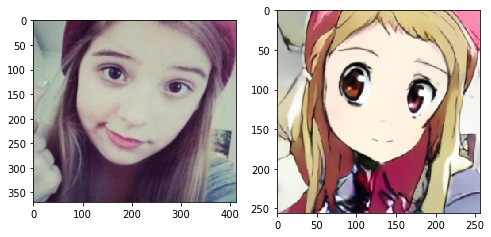

In [21]:
import cv2
import paddlehub as hub

model = hub.Module(name='UGATIT_100w')
# 结果保存在'output/'目录，可以观察可视化结果
result = model.style_transfer(images=[cv2.imread('imgs/test6.jpg')], visualization=True)

img_ori = Image.open('./imgs/test6.jpg')
img = cv2.cvtColor(result[0], cv2.COLOR_BGR2RGB)
img = Image.fromarray(img)

fig = plt.figure(figsize=(8,8))
# 显示原图
ax = fig.add_subplot(1,2,1)
ax.imshow(img_ori)
# 显示生成漫画图
ax = fig.add_subplot(1,2,2)
ax.imshow(img)
plt.show()

上面使用U-GAT-IT模型实现了人像动漫化，根据GAN的应用领域，分为以下算法，

<br></br>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/230089b457b04f6e8b3899e3c62f49872f3061c642014ba7bbaf1ee4eed9a9cb" width = "800"></center>
<center><br>图20：图像生成算法</br></center>
<br></br>

****
注：如果想了解更多图像生成模型细节，请参考图像生成开发套件[PaddleGAN](https://github.com/PaddlePaddle/PaddleGAN)
****



## 3.4 总结

本章我们主要介绍了计算机视觉概念、应用场景和挑战，然后介绍了目前常见的计算机视觉任务(图像分类、目标检测、图像分割、OCR、视频分析、图像生成)，并通过PaddleHub快速实现。

## 3.5 作业

- 安装PaddleHub，更换图片或视频完成以上任意一个或多个视觉任务。

## 参考文献

[1] LeCun Y, Bottou L, Bengio Y, et al. Gradient-based learning applied to document recognition[J]. Proceedings of the IEEE, 1998, 86(11): 2278-2324.
[2] Krizhevsky A, Sutskever I, Hinton G E. Imagenet classification with deep convolutional neural networks[J]. Advances in neural information processing systems, 2012, 25.